In [386]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import scikitplot as skplt
import warnings
import math
warnings.filterwarnings('ignore')

Objective-The goal is to build predictive model that can identify claim is genuine or fraud ,here dataset is taken for auto insurance accident insurance  claim.

In [276]:
#read csv file and see overview of data
insurance=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Automobile_insurance_fraud.csv")
insurance.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [277]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
insurance.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [278]:
#inside dataset its showing '?' which i have to replace with np.NaN
insurance=insurance.replace('?', np.NaN)

In [279]:
#shape of dataset 
insurance.shape  

(1000, 40)

40 columns including target variable , 1000 rows 

In [280]:
#describe dataset
insurance.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [281]:
#check NaN value
insurance.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [282]:
#drop _c39 column because all data is missing
insurance.drop(columns='_c39',axis=1,inplace=True)

In [283]:
#Impute NaN values
insurance['collision_type']=insurance['collision_type'].fillna(insurance['collision_type'].mode()[0])
insurance['property_damage']=insurance['property_damage'].fillna(insurance['property_damage'].mode()[0])
insurance['police_report_available']=insurance['police_report_available'].fillna(insurance['police_report_available'].mode()[0])

In [284]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [285]:
#unique value count inside dataset
insurance.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [286]:
# let's encode the fraud report to numerical values i.e. our target variable
insurance['fraud_reported'] = insurance['fraud_reported'].replace(('Y','N'),(0,1))

In [287]:
#so now convert all object data in numerical value with encoding 
from sklearn.preprocessing import LabelEncoder

In [288]:
label=LabelEncoder()

In [289]:
for i in insurance.columns:
    if insurance[i].dtype=='object':
        insurance[i]=label.fit_transform(insurance[i])
    

In [290]:
insurance.head()

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                 328   48         521585               532             2   
1                 228   42         342868               821             1   
2                 134   29         687698               186             2   
3                 256   41         227811               766             0   
4                 228   44         367455               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               1000                1406.91               0   
1           1               2000                1197.22         5000000   
2           0               2000                1413.14         5000000   
3           1               2000                1415.74         6000000   
4           2               1000                1583.91         6000000   

   insured_zip  insured_sex  insured_education_level  insured_occupation  \
0       466132            1                        4                   2   
1       468176            1                        4                   6   
2       430632            0                        6                  11   
3       608117            0                        6                   1   
4       610706            1                        0                  11   

   insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0               17                     0          53300             0   
1               15                     2              0             0   
2                2                     3          35100             0   
3                2                     4          48900        -62400   
4                2                     4          66000        -46000   

   incident_date  incident_type  collision_type  incident_severity  \
0             49              2               2                  0   
1             41              3               1                  1   
2             44              0               1                  1   
3             19              2               0                  0   
4             34              3               1                  1   

   authorities_contacted  incident_state  incident_city  incident_location  \
0                      4               4              1                996   
1                      4               5              5                628   
2                      4               1              1                685   
3                      4               2              0                669   
4                      2               1              0                220   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1                1   
1                         8                            1                0   
2                         7                            3                0   
3                         5                            1                0   
4                        20                            1                0   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        1               71610   
1                0          0                        0                5070   
2                2          3                        0               34650   
3                1          2                        0               63400   
4                0          1                        0                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020          52080         10           1   
1           780             780           3510          8          12   
2          7700            3850          23100          4          30   
3          6340            6340          50720          3          34   
4     

In [291]:
#split dataset into 2 portion to plot distplot for visualization
insur1=insurance.iloc[::,0:20]
insur1

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
5                   256   39         104594               385             2   
6                   137   34         413978               112             1   
7                   165   37         429027                60             0   
8                    27   33         485665               132             0   
9                   212   42         636550               772             0   
10                  235   42         543610               795             2   
11                  447   61         214618               891             2   
12                   60   23         842643               634             2   
13                  121   34         626808               806             2   
14                  180   38         644081               875             2   
15                  473   58         892874               601             1   
16                   70   26         558938               251             2   
17                  140   31         275265               470             1   
18                  160   37         921202               879             2   
19                  196   39         143972                44             1   
20                  460   62         183430               769             1   
21                  217   41         431876               834             0   
22                  370   55         285496               816             0   
23                  413   55         115399               237             1   
24                  237   40         736882                33             1   
25                    8   35         699044               163             2   
26                  257   43         863236               629             1   
27                  202   34         608513               559             1   
28                  224   40         914088               236             2   
29                  241   45         596785               106             0   
30                   64   25         908616               544             0   
31                  166   37         666333               591             0   
32                  155   35         336614                20             0   
33                  114   30         584859               107             0   
34                  149   37         990493               391             0   
35                  147   33         129872               256             2   
36                   62   28         200152               268             0   
37                  289   49         933293                61             0   
38                  431   54         485664               781             1   
39                  199   37         982871               823             1   
40                   79   26         206213               246             0   
41                  116   34         616337               931             1   
42                   37   23         448961               920             0   
43                  106   30         790442               397             2   
44                  269   44         108844               161             0   
45                  265   40         430029               663             0   
46                  163   33         529112               233             1   
47                  355   47         939631               547             2   
48                  175   34         866931               199             1   
49                  192   35         582011            

In [292]:
#shapeof data
insurance.shape

(1000, 39)

In [293]:
insur1.shape

(1000, 20)

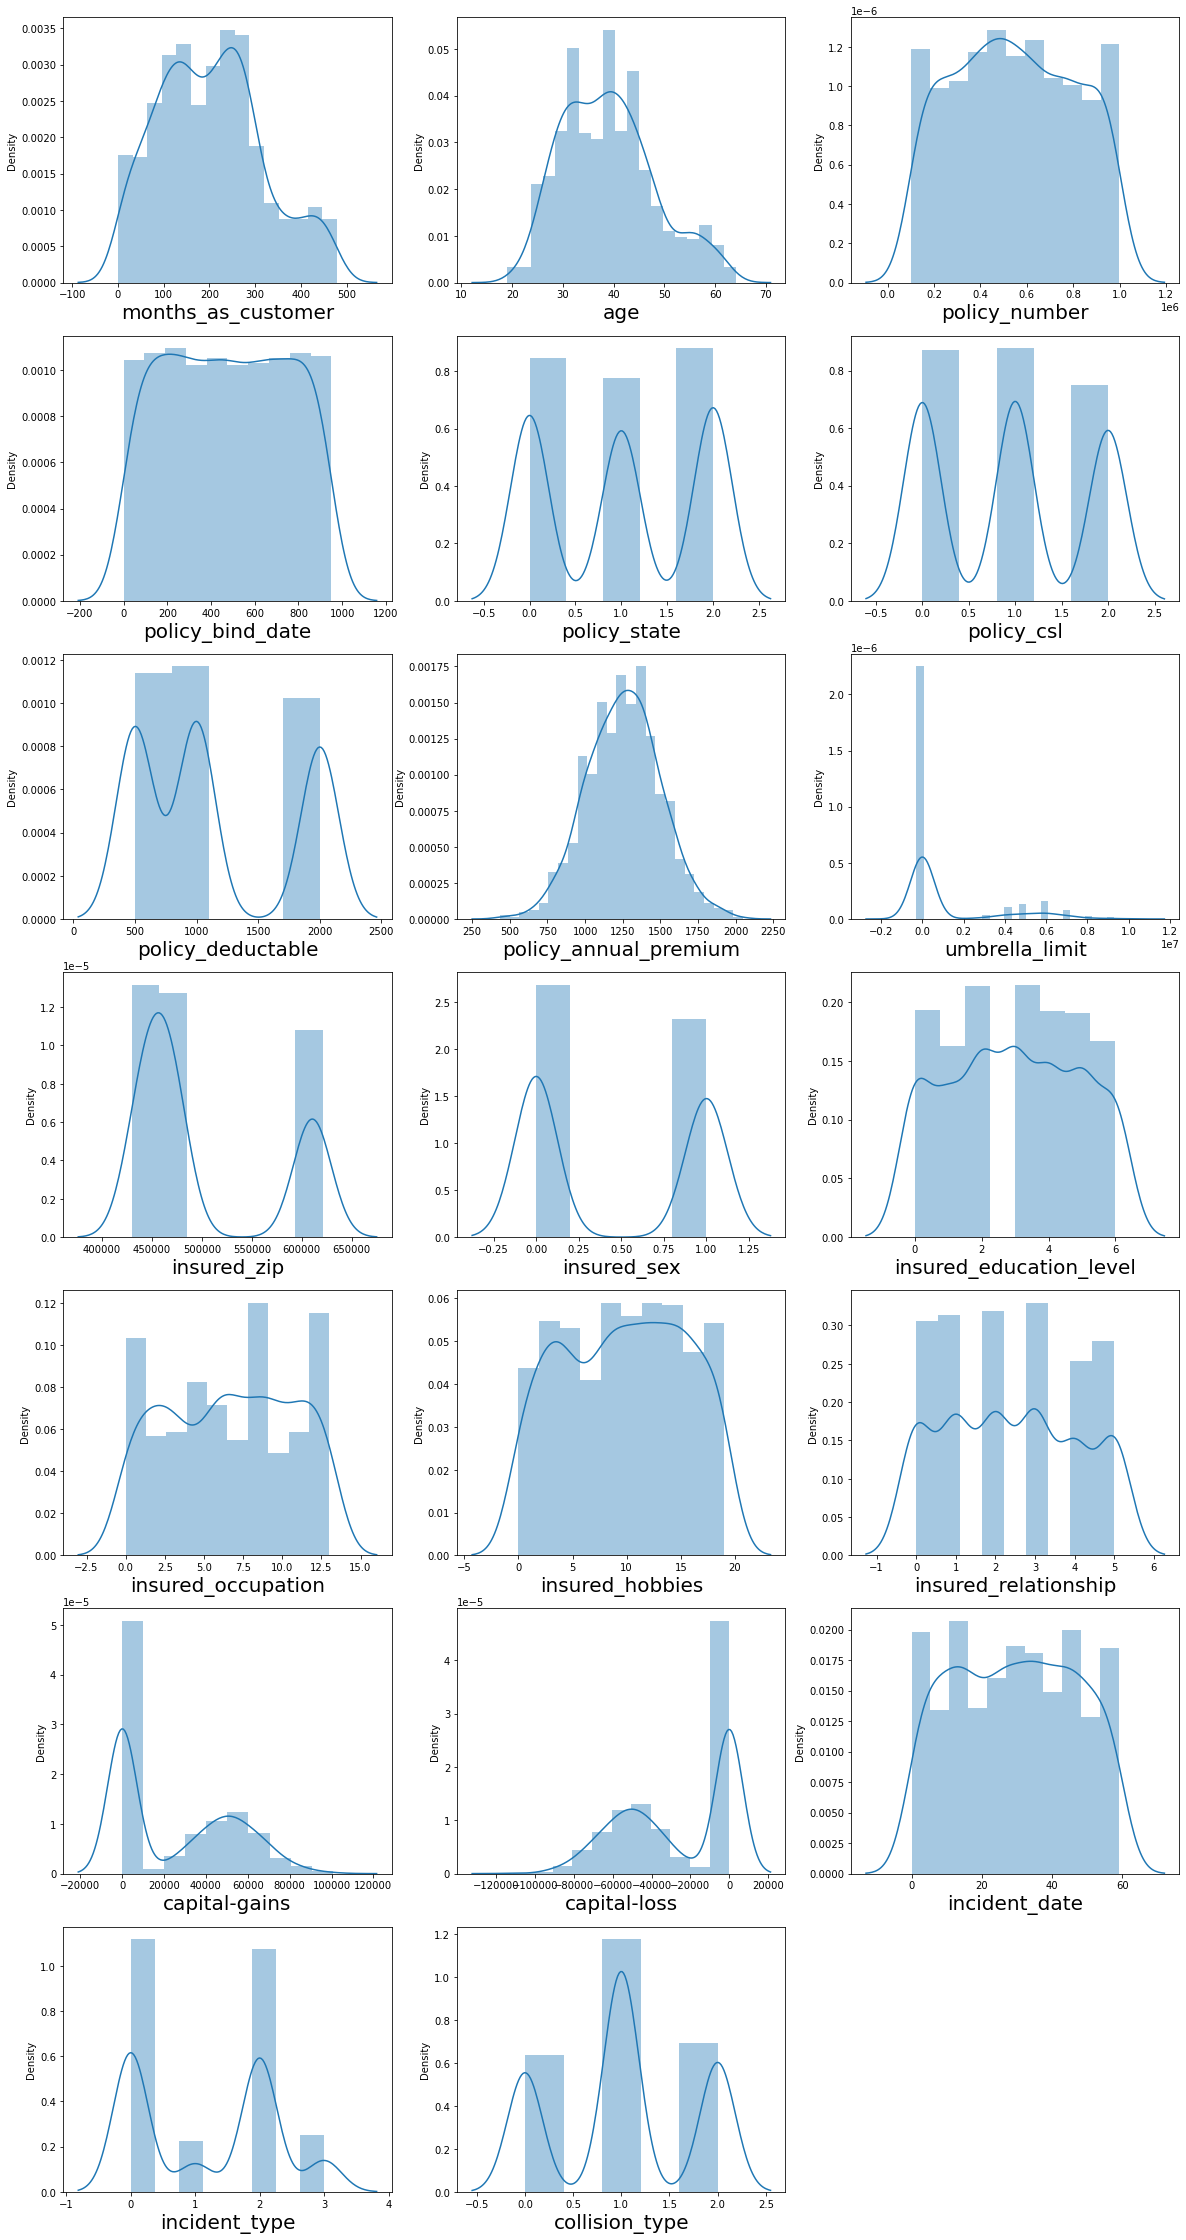

In [294]:
#Visualization of data distribution of insur1 dataset which i have taken from orininal dataset 

plt.figure(figsize=(20,40))
plotnumber=1
for column in insur1:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(insur1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

<Figure size 432x288 with 0 Axes>

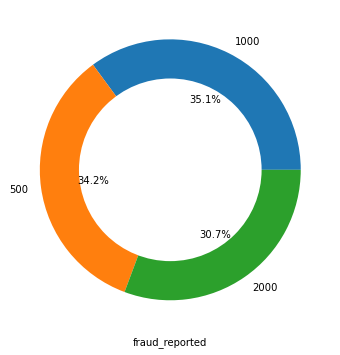

<Figure size 432x288 with 0 Axes>

In [295]:
#piechart analysis for policy_deductable column
plt.figure(figsize=(8,6))
insur1['policy_deductable'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel(i)
plt.ylabel('')
plt.figure()

35% policy_deductable of 1000, and 34.2 % of 500, ,30.7%  belongs to 2000

<Figure size 432x288 with 0 Axes>

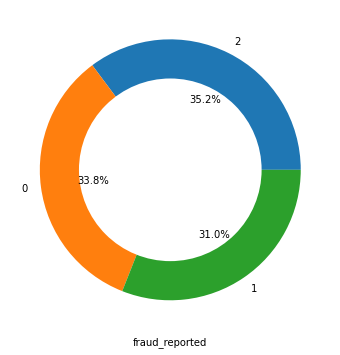

<Figure size 432x288 with 0 Axes>

In [296]:
#piechart analysis for policy_state column
plt.figure(figsize=(8,6))
insur1['policy_state'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel(i)
plt.ylabel('')
plt.figure()

IL 35.2%, In33.8%, oh 31%

<Figure size 432x288 with 0 Axes>

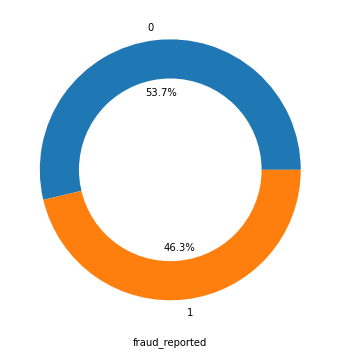

<Figure size 432x288 with 0 Axes>

In [297]:
#piechart analysis for insured_sex column
plt.figure(figsize=(8,6))
insur1['insured_sex'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel(i)
plt.ylabel('')
plt.figure()

53.7% fraud with fenale ,46.3% fraud with male 

In [298]:
#split dataset into 2 portion to plot distplot for visualization
insur2=insurance.iloc[::,21:39]
insur2

authorities_contacted  incident_state  incident_city  incident_location  \
0                        4               4              1                996   
1                        4               5              5                628   
2                        4               1              1                685   
3                        4               2              0                669   
4                        2               1              0                220   
5                        1               4              0                891   
6                        4               1              6                539   
7                        4               5              1                276   
8                        4               6              0                429   
9                        3               0              2                224   
10                       4               1              3                 61   
11                       1               4              6                553   
12                       0               4              3                633   
13                       2               4              6                622   
14                       4               4              6                658   
15                       3               6              2                953   
16                       3               1              5                459   
17                       4               6              3                393   
18                       3               1              4                319   
19                       4               5              1                803   
20                       4               1              1                486   
21                       4               4              0                889   
22                       0               4              2                164   
23                       0               6              3                518   
24                       3               5              5                162   
25                       3               2              0                262   
26                       4               3              0                165   
27                       2               5              4                307   
28                       3               4              3                244   
29                       4               4              4                123   
30                       0               4              1                412   
31                       4               6              5                900   
32                       4               1              0                565   
33                       0               1              2                823   
34                       1               6              2                277   
35                       3               6              6                233   
36                       4               1              4                445   
37                       2               6              0                637   
38                       4               1              2                332   
39                       0               0              1                264   
40                       0               6              1                427   
41                       4               6              4                520   
42                       3               4              6                245   
43                       3               0              0                635   
44                       3               4              6                 78   
45                       3               1              0                360   
46                       1               0              3                720   
47                       1               6              0                879   
48                       4               1              0                630   
49   

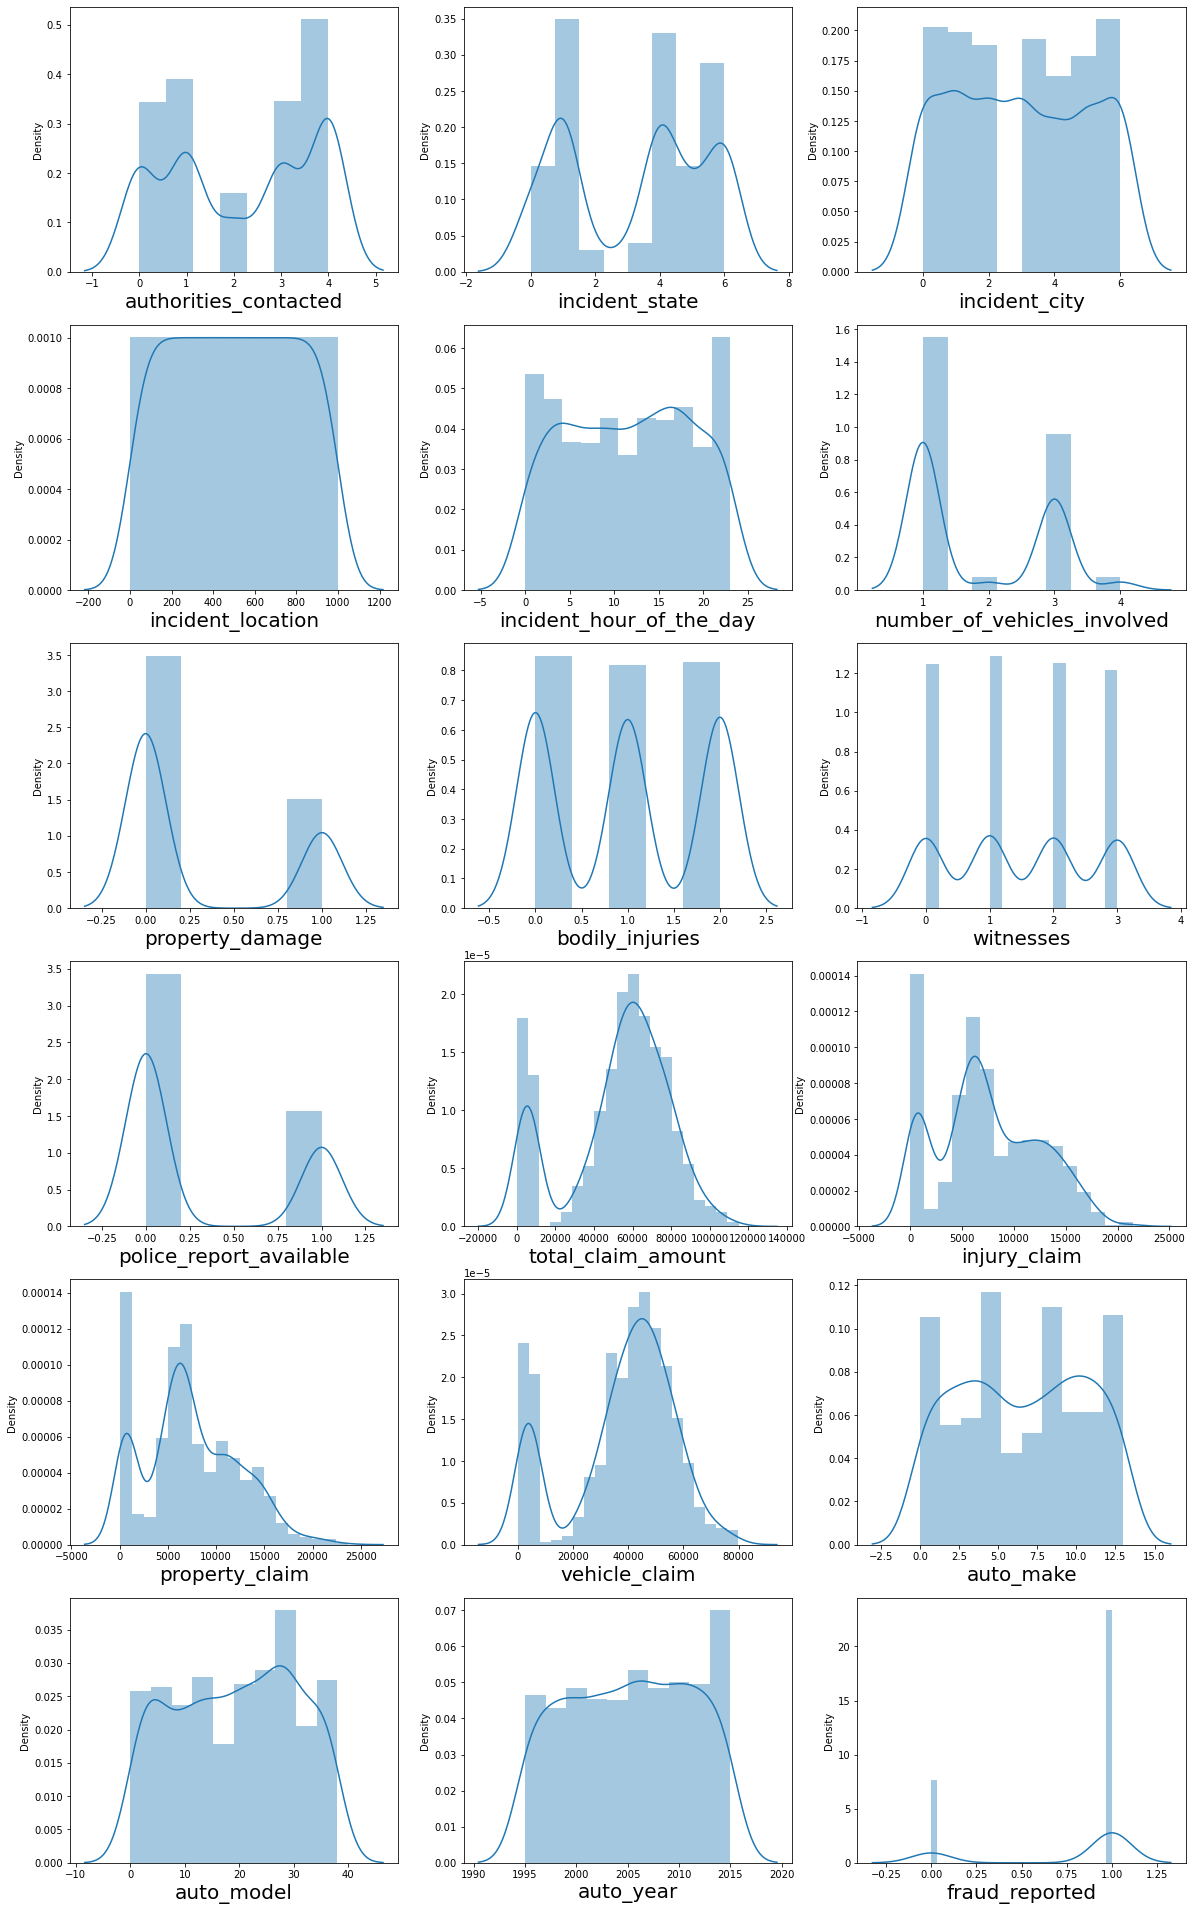

In [299]:
#Visualization of data distribution 

plt.figure(figsize=(20,40))
plotnumber=1
for column in insur2:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(insur2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

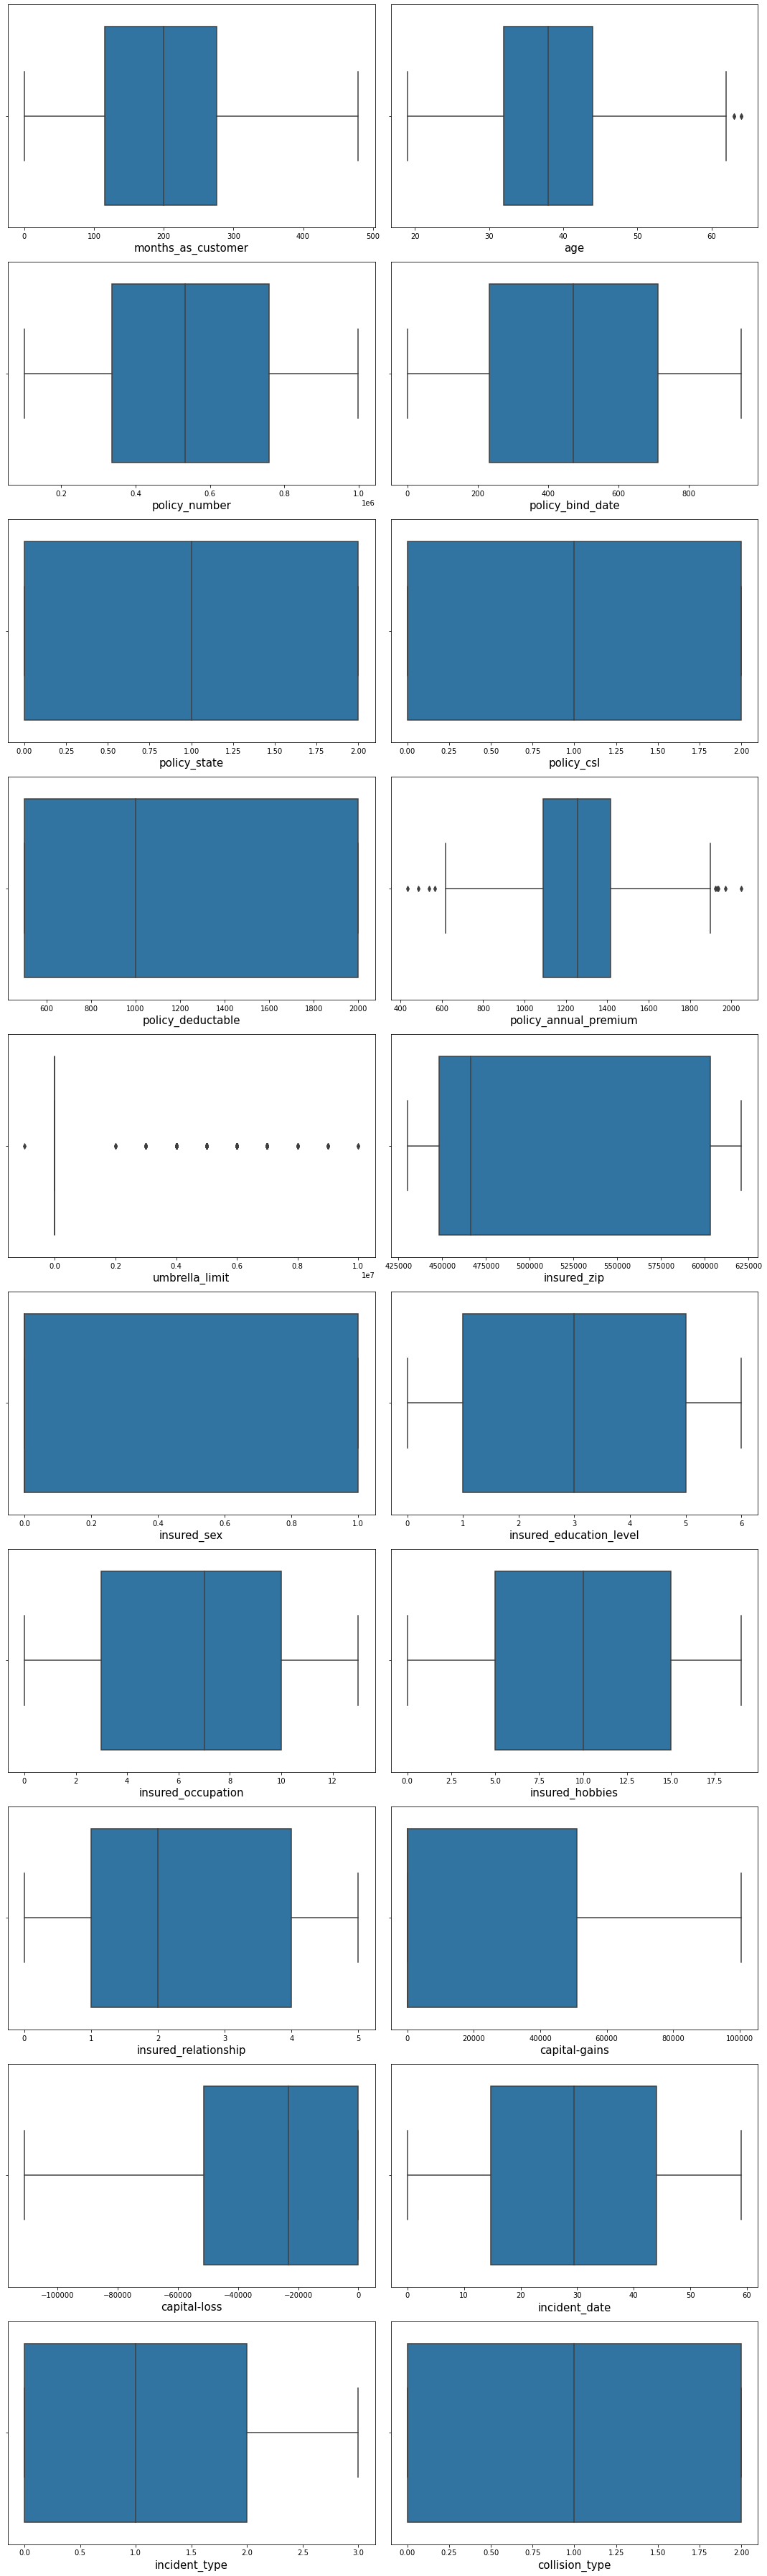

In [300]:
#Visualize the outliers using boxplot first dataset insur1
plt.figure(figsize=(15,50))
graph=1
for column in insur1:
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        ax=sns.boxplot(insur1[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

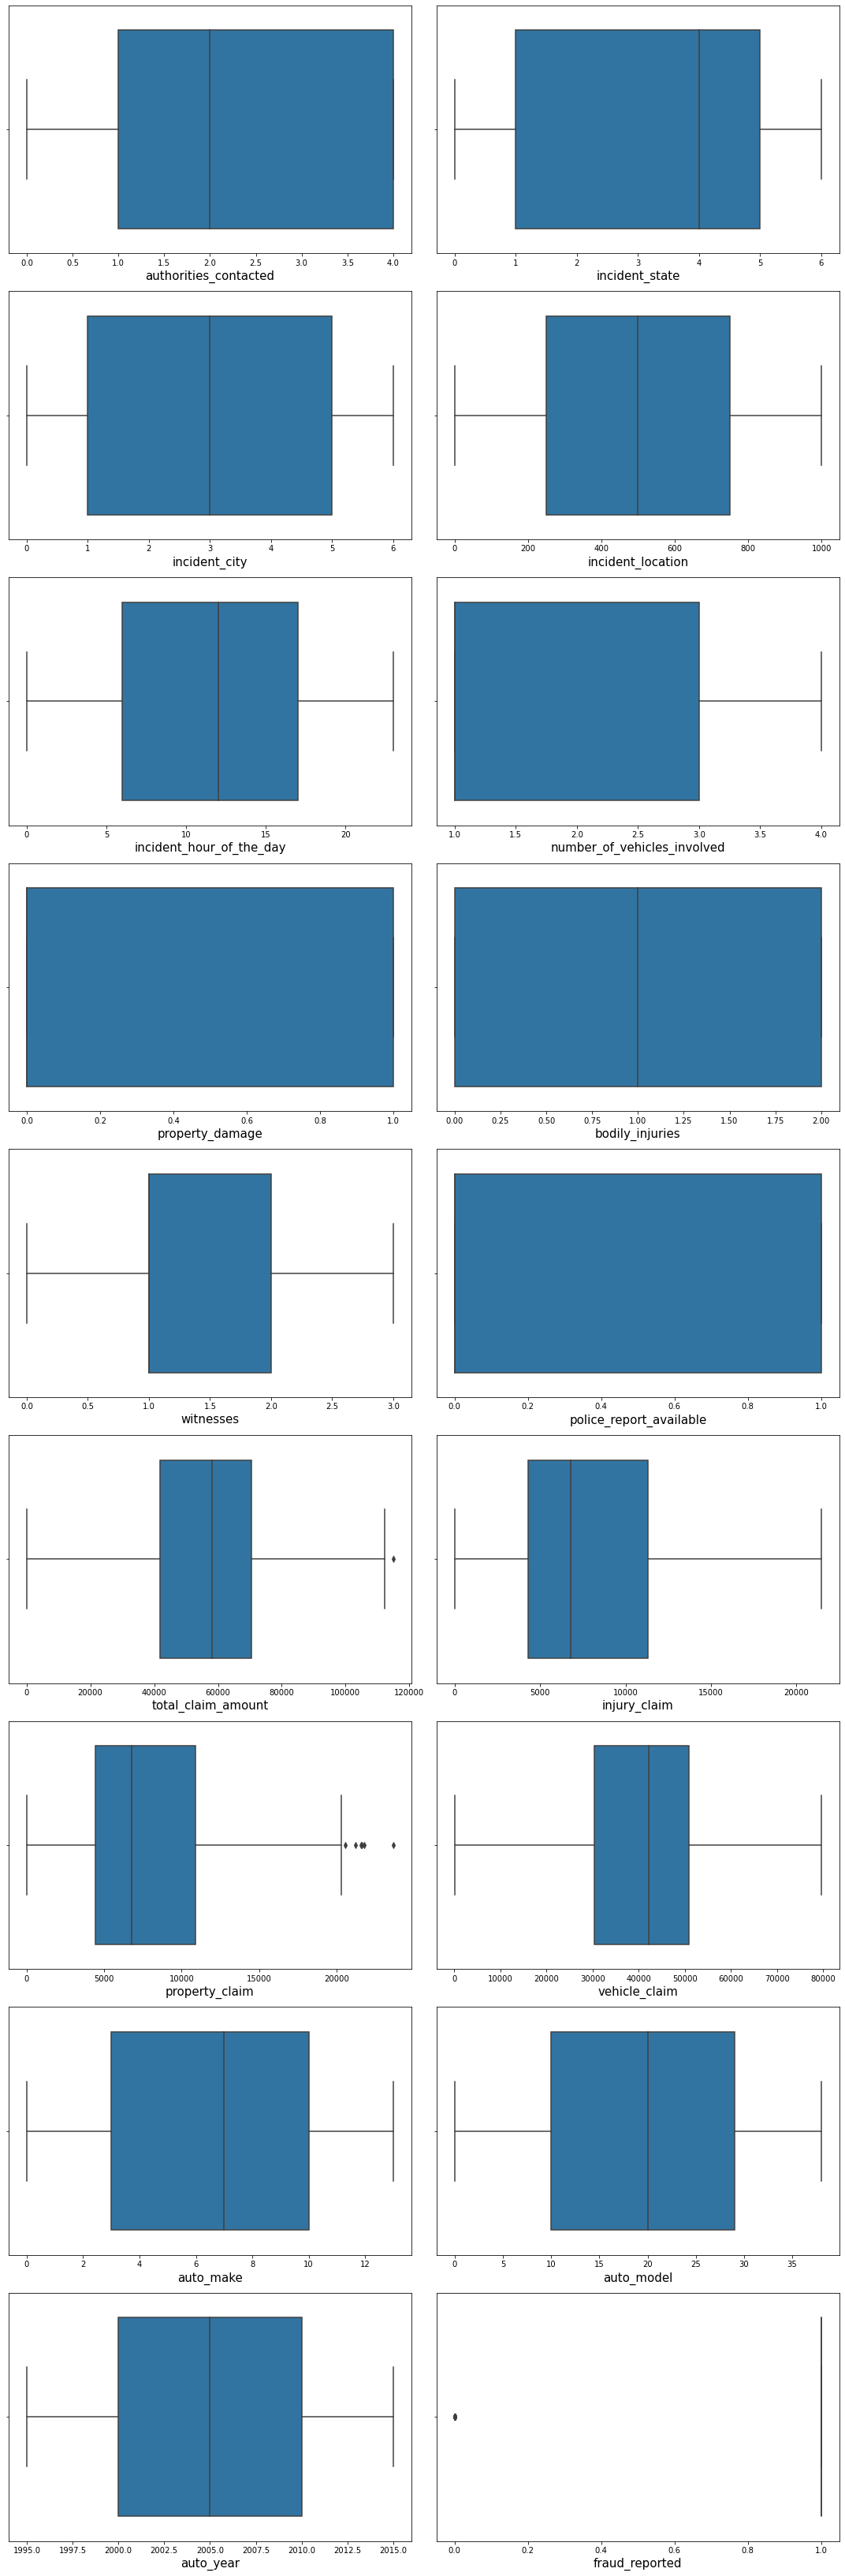

In [301]:
#Visualize the outliers using boxplot second dataset insur2
plt.figure(figsize=(15,50))
graph=1
for column in insur2:
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        ax=sns.boxplot(insur2[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

only total_cliam amount,property_claim column have few outliers

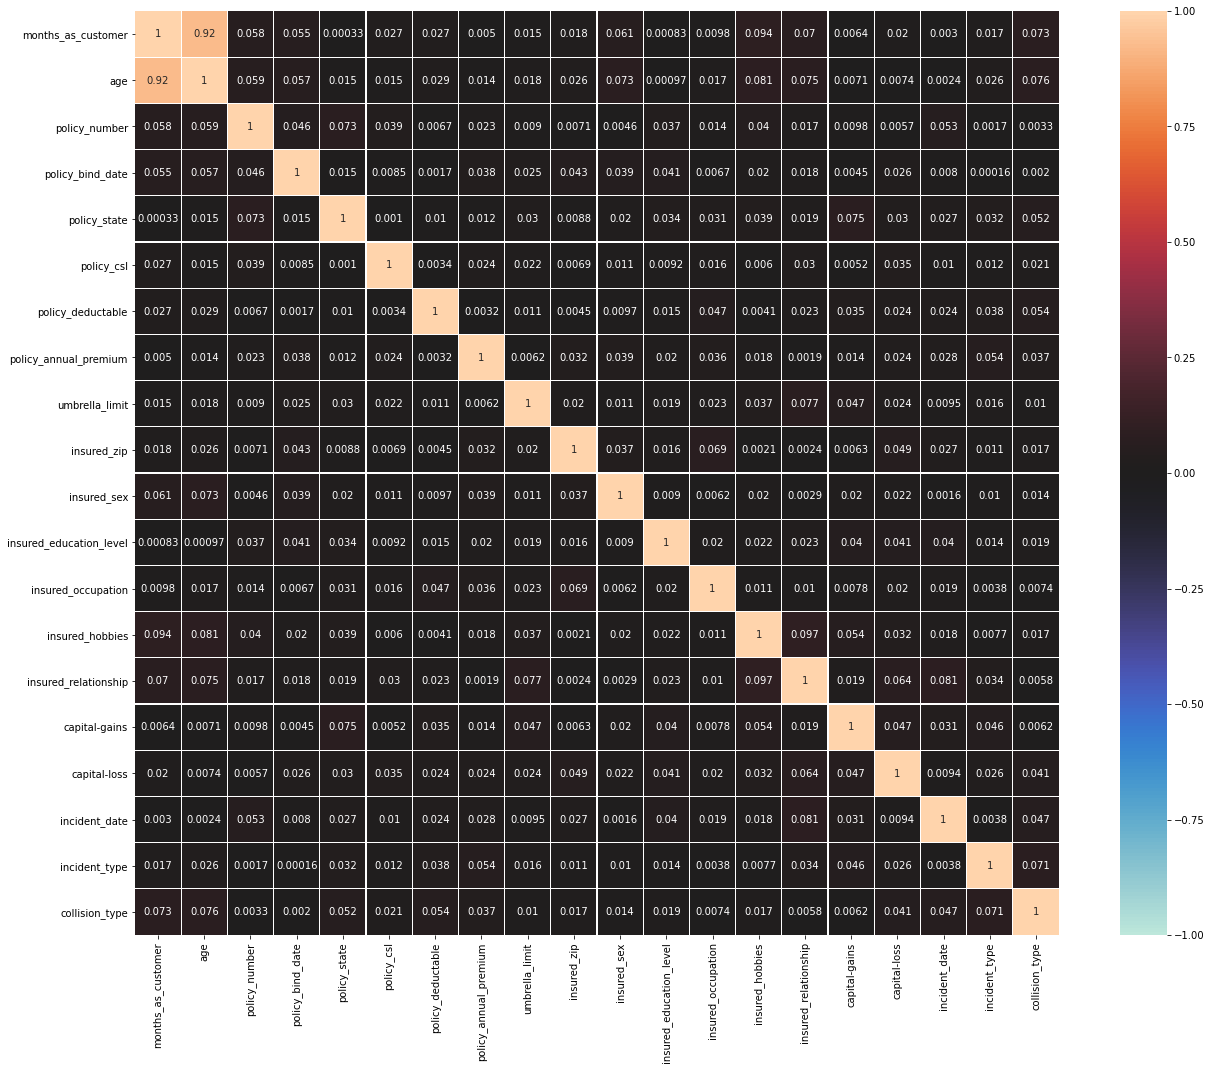

In [302]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=insur1.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

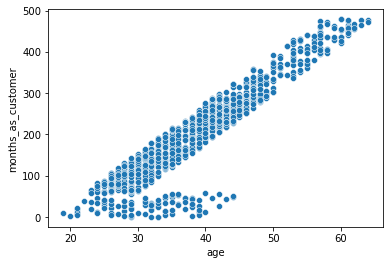

In [303]:
#'age', and month_as_custmoers  have high score lets check corr with scatter plot
sns.scatterplot(x='age',y='months_as_customer', data=insur1)

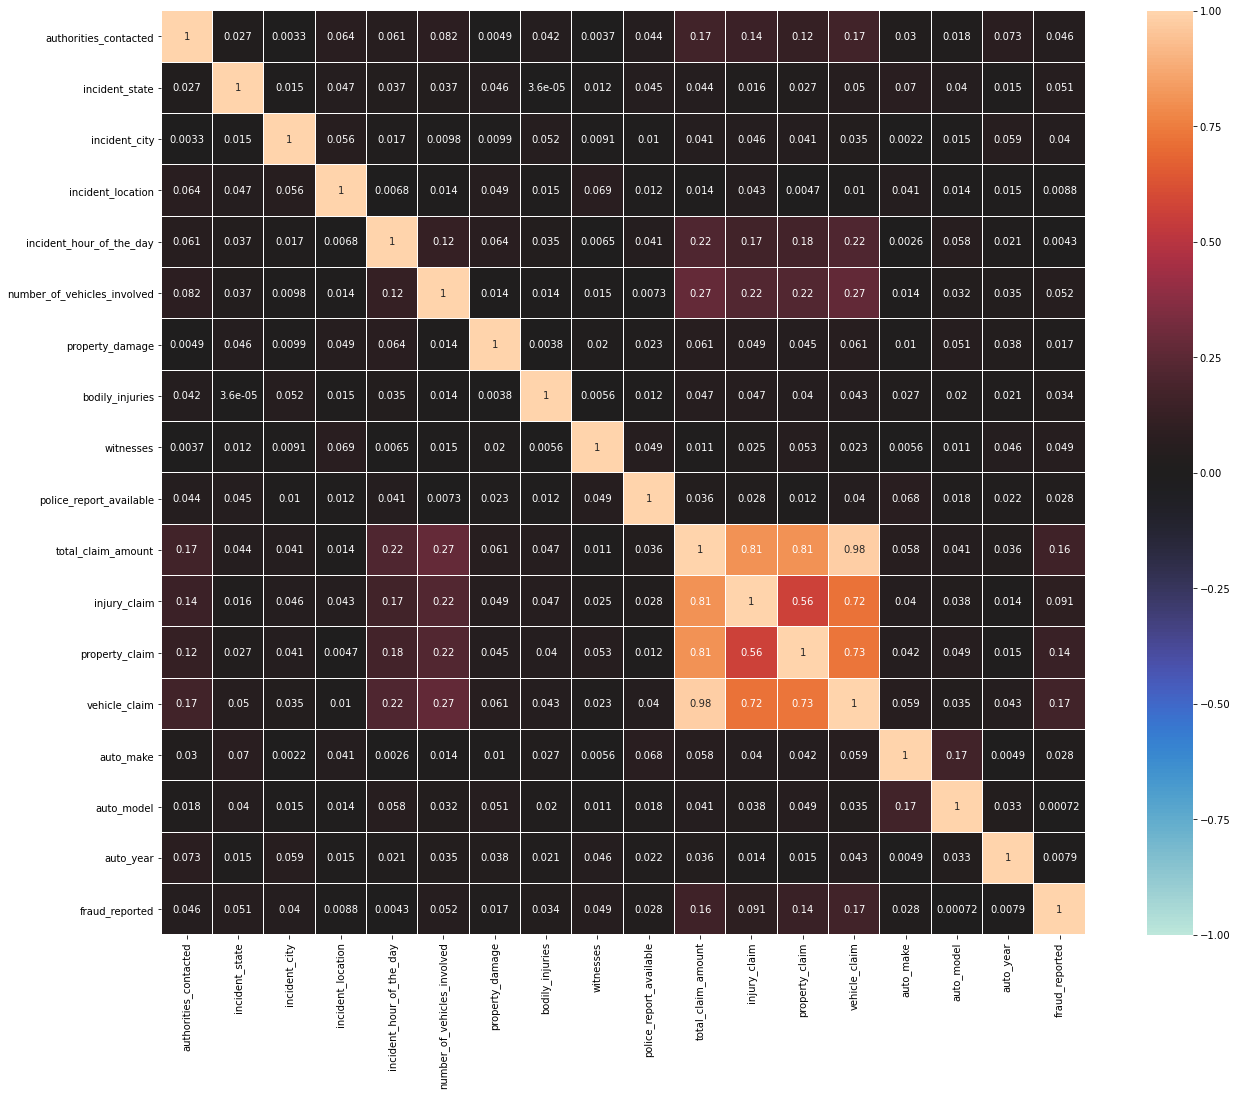

In [304]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity  dataset 2nd part
df_corr=insur2.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

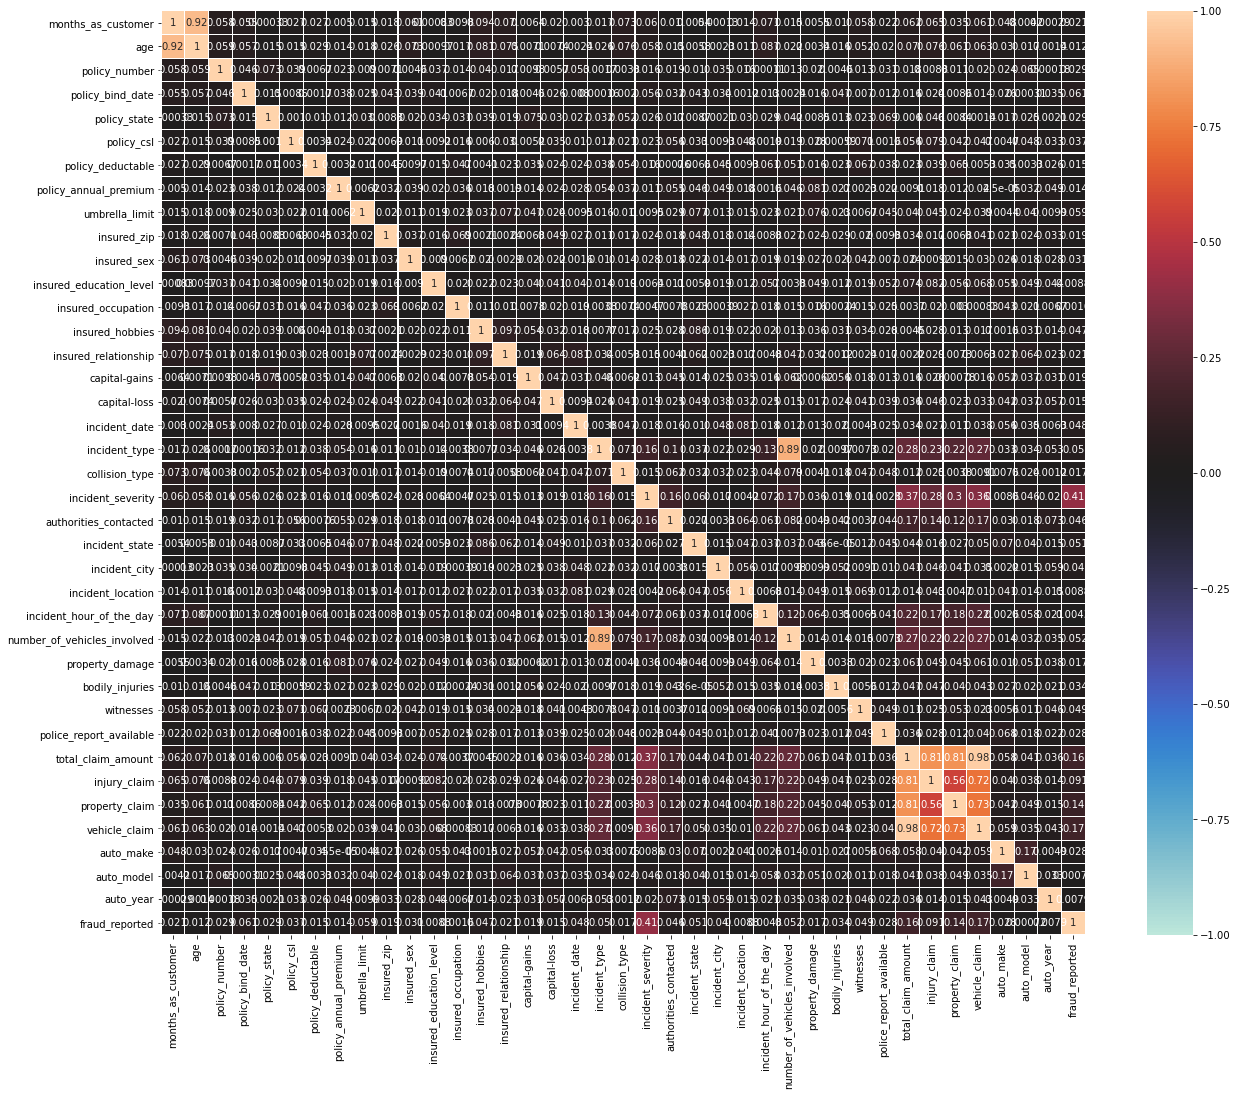

In [305]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity here combine all 
                                         #data to see match above split data heatmap plot
df_corr=insurance.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='incident_type', ylabel='number_of_vehicles_involved'>

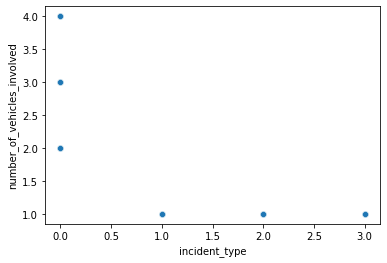

In [306]:
#incident_type and number_of_vehicles_involved
sns.scatterplot(x='incident_type',y='number_of_vehicles_involved',data=insurance)

no correlation 

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

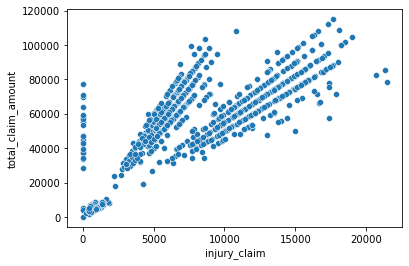

In [307]:
#injury_claim,total_claim_amout
sns.scatterplot(x='injury_claim',y='total_claim_amount',data=insurance)

weak corrleation between injury_claim and total_claim_amount

<AxesSubplot:xlabel='injury_claim', ylabel='property_claim'>

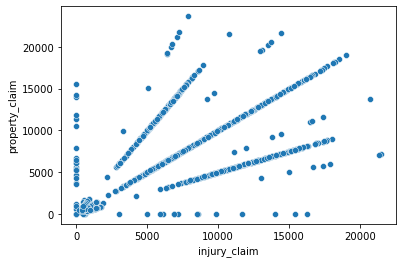

In [308]:
#injury_claim,property_claim
sns.scatterplot(x='injury_claim',y='property_claim',data=insurance)

no corrleation between injury_claim and property_claim

<AxesSubplot:xlabel='vehicle_claim', ylabel='property_claim'>

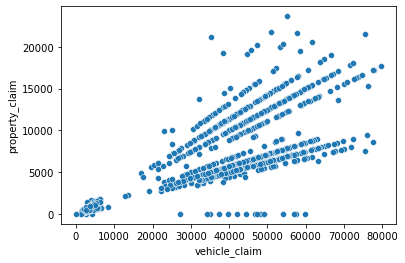

In [311]:
#vehicle calim propetry claim corr check
sns.scatterplot(x='vehicle_claim',y='property_claim',data=insurance)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

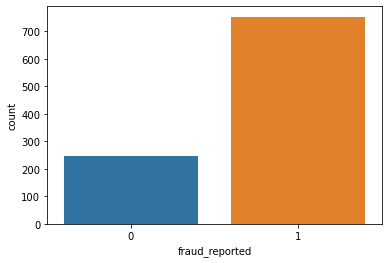

In [312]:
#check target variable dataset balanced or imbalnced
sns.countplot('fraud_reported',data=insurance)

target variable is imbalanced lets balanced it first

# Features Selection  & Upsampling

In [313]:
Y=insurance.fraud_reported
X=insurance.drop(columns='fraud_reported',axis=1)

In [314]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7,stratify=Y)

In [315]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7)

In [316]:
from sklearn.utils import resample

In [317]:
x=pd.concat([x_train,y_train],axis=1)

In [318]:
Yes=x[x.fraud_reported==0]
No=x[x.fraud_reported==1]

In [319]:
Yes.shape

(174, 39)

In [320]:
No.shape

(526, 39)

In [321]:
#upsamling minority
sampled=resample(Yes,replace=True, #sample with replacement
                   n_samples=len(No), #match number is majority class
                    random_state=27) #reproduciable result

In [322]:
#combine majority and upsamled minority
upsample =pd.concat([sampled,No])

In [323]:
#check new class counts   #upsampling use when dataset is small
upsample.fraud_reported.value_counts()

1    526
0    526
Name: fraud_reported, dtype: int64

In [324]:
Y=insurance.fraud_reported

now class is balanced lets build the model before that features column is more lets apply PCA techniques for best features selection

In [325]:
from sklearn.decomposition import PCA

In [326]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)  

In [327]:
pca=PCA()   #PCA reduce features demensiality reduction technique convert features in some component,when its apply mean is0
pca.fit_transform(x_scaled)  #features selection by screep graph and plot

array([[ 8.01546759e-01,  9.60429509e-01,  1.28344479e+00, ...,
        -1.63216928e-01, -2.54836456e-02,  1.50532420e-15],
       [-3.67296329e+00,  8.49169600e-01,  3.28514510e-01, ...,
         5.35970483e-01,  8.53870064e-02,  6.37159138e-16],
       [-6.24148051e-01, -9.51518219e-01, -1.61354933e+00, ...,
         8.16806365e-02, -3.06945734e-01, -3.24238154e-16],
       ...,
       [ 8.04582604e-01, -9.98560246e-01, -1.07385912e+00, ...,
         3.57036851e-02,  1.74453722e-01, -2.80212318e-16],
       [-7.45978062e-01,  3.90933284e+00,  5.68015799e-01, ...,
        -1.04315960e-01,  2.14993817e-01,  3.23171452e-16],
       [-3.18320073e+00,  3.16742226e+00, -1.70479895e+00, ...,
        -6.18468971e-01,  1.06497664e-01,  1.00829893e-16]])

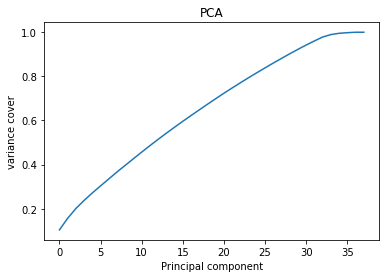

In [328]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('variance cover')        #this screep plot give idea to selct top 95% faetures only
plt.title('PCA')
plt.show()

around 35 principal component giving 95% variance ist safe to consider starting 35 PC's

In [329]:
pca=PCA(n_components=35)
new_comp=pca.fit_transform(x_scaled)
princ_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35'])
princ_comp

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.801547  0.960430  1.283445  4.011291  0.210513 -0.894790  0.427956   
1   -3.672963  0.849170  0.328515  0.126412 -0.302059  0.744093  0.680954   
2   -0.624148 -0.951518 -1.613549 -1.429494 -0.749223 -1.058446 -0.549326   
3    0.113295  1.082716  0.922254 -2.596276 -2.081664 -0.034781  0.300931   
4   -3.207854  1.376095 -0.095062 -2.516087  0.935076 -1.573766 -0.770545   
5    1.369996  0.285013 -0.930787  0.164264  1.231216  1.622719 -0.608133   
6    2.097079 -1.013460 -0.355173 -1.094188 -1.175718  1.320502  0.109998   
7    0.441196  0.042441 -1.404423 -0.641326  1.444040  0.610655 -2.153100   
8   -2.463330 -1.062042  0.471668  1.248745  0.760340  1.055616 -0.146738   
9   -1.260473  1.095496  0.901457 -1.222391  1.419332  1.050339 -0.068155   
10   1.648692  0.743054  2.160289 -0.931793  0.628027  0.342333 -0.216809   
11   5.493053  2.499955  0.420673  1.294419  0.436366  0.892702 -0.759515   
12  -0.746953 -1.737173  1.711826  0.946207  0.993605 -0.557800  0.524150   
13  -2.916136 -0.363178 -0.673651 -0.205007 -1.513334  0.829585  0.291691   
14  -1.072324  0.115779  0.802852  0.685513 -1.808729 -0.486785 -1.797272   
15   2.265831  2.229396 -1.892504  1.307449  0.505633 -1.816276  2.689859   
16  -0.004440 -1.764375 -1.700041 -0.421696 -0.845929 -1.646110 -1.177874   
17   0.302786 -0.921974  0.922596 -0.461326 -2.283690  0.510651 -1.034771   
18   0.742092 -0.865725  1.328151  0.000525 -1.287120 -2.556877  1.003000   
19   0.708410 -0.713200 -1.796209  0.458693 -0.747540 -1.438951  0.033298   
20   0.068819  3.507765 -2.404493 -1.552329  1.104776  0.169650 -0.246469   
21  -0.912355 -0.228982 -2.281449 -0.907807 -0.611857 -1.136877  0.914517   
22   2.864820  1.835609 -1.473457  1.072291 -0.275719  2.436210  0.851396   
23   2.476032  2.575363  1.935801 -0.491412 -0.503262  1.651535 -0.144490   
24   0.863015  0.205060  1.259238  0.392432 -0.382038  0.921438 -0.611515   
25   2.323153 -1.374765 -0.644921 -0.145566  0.407560  0.446872 -1.521707   
26  -2.915447  1.371124 -0.734184  1.654994  0.567641  0.747320 -1.133995   
27  -3.484521  0.140825  0.402788  0.086829  0.759824  0.539160  0.807792   
28   1.138990 -0.039909  1.159937  0.257248 -0.652506 -1.284422 -1.113489   
29   1.952216  0.757911  1.942214 -2.653120 -1.623903  0.108391 -0.376603   
30   2.768904 -2.540834 -1.946776  1.405515  0.414083  0.928316  2.102961   
31   1.177453 -0.673142 -1.494535  0.592832 -0.113401 -1.377717  0.416988   
32  -1.294428 -1.030913 -2.230643  0.465785  1.687223 -0.503682  0.520794   
33   2.519732 -1.359670 -0.515926 -0.402338 -0.522827  0.996260  0.914015   
34   0.069290 -0.546426  1.623211  1.006542  1.441383 -0.557007  0.222081   
35  -0.064879 -0.850302  1.733258  1.883563  0.926438  0.189944 -0.504382   
36  -0.857492 -1.530444  1.463572 -1.417669  0.133150  1.873372 -0.646516   
37  -2.811122  1.604043 -1.081097  0.893269  0.420984 -0.957104 -0.214634   
38   1.511795  2.290679 -1.792365 -1.228349 -0.962977 -1.573140  1.563181   
39   0.603417  0.540436  1.167288 -1.297479 -0.950988  0.781301  1.680311   
40  -0.934428 -1.641384  0.972858 -0.772729  0.762277  1.433830 -0.170227   
41   2.313471 -0.634699  2.754407 -1.584242 -0.560476 -1.465273 -0.093616   
42   0.231847 -2.792147 -1.167588 -0.393160  0.057756 -0.494413 -0.016405   
43  -0.731324 -1.193552  0.585153 -0.101181 -1.785502  0.247464  0.497130   
44   0.440394  1.130327  1.081262 -0.283706  0.224327  3.082610 -0.114827   
45   0.121300 -0.105304 -1.482472 -0.717963  0.671498  0.163461  1.213333   
46   1.346362 -1.547410 -1.038282  0.482443  2.031603 -0.194435  0.897691   
47   1.334330  1.448830 -1.322921  0.953355  0.387754 -0.737946  0.167363   
48  -4.268002 -0.191627  0.503948 -0.352808 -0.535304 -1.963408  0.145247   
49   0.958288 -0.311403  2.031527 -0.486644  0.102263  1.472761  0.070612   
50   2.933184  3.345940 -0.666556 -1.199004  0.046418  0.238385 -2.394086   
51  -3

# Logistic Regression model 

In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
#building model to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(princ_comp,Y,test_size=.25,random_state=100)
Lr=LogisticRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)

In [332]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.26      0.33        61
           1       0.79      0.90      0.84       189

    accuracy                           0.74       250
   macro avg       0.62      0.58      0.59       250
weighted avg       0.71      0.74      0.72       250



In [333]:
#Logistic model score
Lr.score(x_train,y_train)

0.8173333333333334

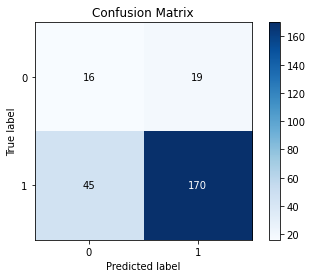

In [334]:
#logistic model confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

# Hyperparameter Tuning of Logisticreg model

In [335]:
from sklearn.model_selection import GridSearchCV

In [336]:
Lr = LogisticRegression()
grid_values = {'penalty': ['l1','l2'],
               'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [337]:
grid_Lr = GridSearchCV(Lr, param_grid = grid_values,scoring = 'recall')
grid_Lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [338]:
grid_Lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [339]:
#invoke with best parameters
Lr=LogisticRegression(C=.001,penalty='l2')

In [340]:
Lr.fit(x_train,y_train)

LogisticRegression(C=0.001)

In [341]:
Lr.score(x_train,y_train)

0.752

In [342]:
#Predict values based on new parameters
y_pred = grid_Lr.predict(x_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

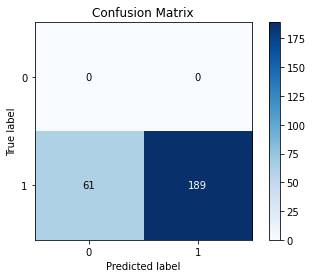

In [343]:
#Post tuning confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [344]:
#post tuning classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.76      1.00      0.86       189

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



Cross validation of model

In [345]:
from sklearn.model_selection import KFold,cross_val_score

In [346]:
cross_val_score(Lr,x_scaled,Y,cv=5).mean()

0.7529999999999999

model is accurate as cv score and model score have no diffrence

# Decesion Tree classification

In [347]:
from sklearn.tree import DecisionTreeClassifier

In [348]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [349]:
dt.score(x_train,y_train)

1.0

In [350]:
y_pred=dt.predict(x_test)

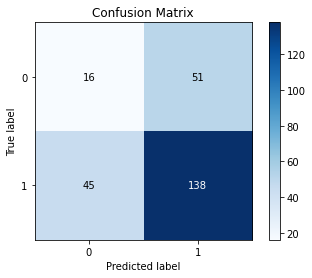

In [351]:
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

Model score is 1 but confusion matrix suggest that it have overfitting issue lets do hyperparameter tuning

In [352]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        61
           1       0.75      0.73      0.74       189

    accuracy                           0.62       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.63      0.62      0.62       250



# Hyperparameter Tuning of decesiontree

In [353]:
from sklearn.model_selection import GridSearchCV

In [354]:
#lets tune three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={'criterion':['gini','entropy'],
           'max_depth': range(2,10,3),
           'min_samples_leaf':range(1,10,2),
           'min_samples_split':range(2,10,2)}

In [355]:
#cv cross validation ,n_jobs menas apply entire CPU to do the job so that in increase process 
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1) 

In [356]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [357]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [358]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=1,min_samples_split=2)

In [359]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [360]:
dt.score(x_train,y_train)

0.752

In [361]:
y_pred=dt.predict(x_test)

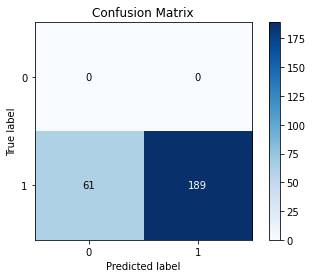

In [362]:
#post tuning confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

# GradientBoostingClassifier model

In [363]:
from sklearn.ensemble import GradientBoostingClassifier

In [364]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [365]:
y_pred=gbc.predict(x_test)

In [366]:
#moel score
gbc.score(x_train,y_train)

0.968

In [373]:
#cross validiation of model
cross_val_score(gbc,x_scaled,Y,cv=5).mean()

0.8310000000000001

Model is overfitting issue as CV score and model score have diffrence

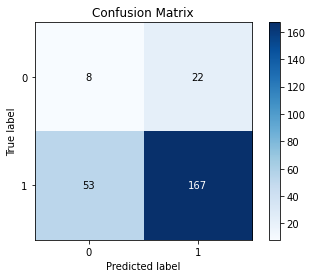

In [367]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

In [368]:
#classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.13      0.27      0.18        30
           1       0.88      0.76      0.82       220

    accuracy                           0.70       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.79      0.70      0.74       250



Hyperparameter Tuning of GradientBoostingClassifier model

In [369]:
param={'loss':['deviance'],
    'learning_rate':[0.1,0.001,0.01,0.3],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [370]:
grid_search=GridSearchCV(estimator=gbc,param_grid=param,cv=5)

In [371]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.001, 0.01, 0.3],
                         'loss': ['deviance'],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [372]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'n_estimators': 250,
 'subsample': 1.0}

In [374]:
#fit best parameters
gbc=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.01,loss='deviance',n_estimators=250,subsample=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, subsample=1)

In [375]:
y_pred=gbc.predict(x_test)

In [379]:
#post tuning model score
gbc.score(x_train,y_train)

0.856

**** confusion matrix post tuning****


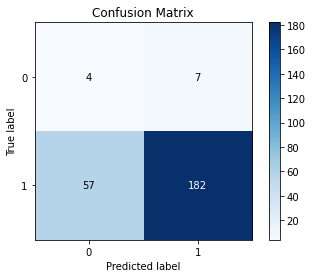

In [377]:
print('**** confusion matrix post tuning****')
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

In [378]:
print('*********************Classification Report********************')
print(classification_report(y_pred,y_test))

*********************Classification Report********************
              precision    recall  f1-score   support

           0       0.07      0.36      0.11        11
           1       0.96      0.76      0.85       239

    accuracy                           0.74       250
   macro avg       0.51      0.56      0.48       250
weighted avg       0.92      0.74      0.82       250



In [380]:
cross_val_score(gbc,x_scaled,Y,cv=5).mean()

0.836

so this model score is 85 and cv score is 83 no huge diffrence means model is quite accurate

# KNN Classification Model

In [381]:
from sklearn.neighbors import KNeighborsClassifier

In [382]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [390]:
#model score
knn.score(x_train,y_train)

0.7893333333333333

In [387]:
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.728


In [388]:
print(confusion_matrix(y_pred,y_test))

[[  9  16]
 [ 52 173]]


In [389]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.15      0.36      0.21        25
           1       0.92      0.77      0.84       225

    accuracy                           0.73       250
   macro avg       0.53      0.56      0.52       250
weighted avg       0.84      0.73      0.77       250



In [391]:
cross_val_score(knn,x_scaled,Y,cv=5).mean()

0.72

cv score & model score diffrence shows model have overfitting issue

Hyperparameter Tuning of KNN model

In [392]:
#parameters for tuning KNNclassifier model
param={ 'n_neighbors':[5,7,9,11,13],
    'weights':['uniform'],
    'algorithm':['auto'],
    'leaf_size':[4,8,12,16,30]
      }

In [393]:
#GridsearchCV  
grid_search=GridSearchCV(knn,param_grid=param,cv=5,n_jobs=-1)

In [394]:
#fit gridsearch into train data
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [4, 8, 12, 16, 30],
                         'n_neighbors': [5, 7, 9, 11, 13],
                         'weights': ['uniform']})

In [395]:
#find out best parameters to tune KNNmodel
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 4, 'n_neighbors': 11, 'weights': 'uniform'}

In [396]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=4,n_neighbors=11,weights='uniform')

In [397]:
#fit KNN model in to training dataset
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=11)

In [398]:
knn.score(x_train,y_train)

0.7546666666666667

In [399]:
y_pred=knn.predict(x_test)

In [400]:
#post tuning print Classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.03      0.22      0.06         9
           1       0.96      0.76      0.85       241

    accuracy                           0.74       250
   macro avg       0.50      0.49      0.45       250
weighted avg       0.93      0.74      0.82       250



In [401]:
#post tuning print confusion matrix
print(confusion_matrix(y_pred,y_test))

[[  2   7]
 [ 59 182]]


In [402]:
#Cross validation score of KNN model
cross_val_score(knn,x_scaled,Y,cv=5).mean()

0.7450000000000001

cross val score and model score is close model is accurate after tuning

# RandomForest Classification model

In [403]:
from sklearn.ensemble import RandomForestClassifier

In [404]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [405]:
rfc.score(x_train,y_train)

1.0

In [407]:
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.736


In [408]:
#print confusion matrix
print(confusion_matrix(y_pred,y_test))

[[  2   7]
 [ 59 182]]


In [409]:
#print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.03      0.22      0.06         9
           1       0.96      0.76      0.85       241

    accuracy                           0.74       250
   macro avg       0.50      0.49      0.45       250
weighted avg       0.93      0.74      0.82       250



In [410]:
#cross validation score 
cross_val_score(rfc,x_scaled,Y,cv=5).mean()

0.765

Hyperparameter tuning of RandomFirest model

In [411]:
params={'n_estimators':[13,15,18],
      'criterion':['entropy'],
      'max_depth':[15],
      'min_samples_split':[10,11,18],
      'min_samples_leaf':[5,6]}

In [413]:
grid=GridSearchCV(rfc,param_grid=params) 
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11, 18],
                         'n_estimators': [13, 15, 18]})

In [414]:
#best parameters
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 18,
 'n_estimators': 13}

In [416]:
#reinitiating model with best parameters
rfc.fit(x_train,y_train)
y_pred= rfc.predict(x_test)

In [417]:
rfc_conf_mat=confusion_matrix(y_test,y_pred)
print('confusion_matrix=>',"\n",rfc_conf_mat)
print('acurracy rf norma====>',accuracy_score(y_test,y_pred))

confusion_matrix=> 
 [[  2  59]
 [  5 184]]
acurracy rf norma====> 0.744


In [418]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.29      0.03      0.06        61
           1       0.76      0.97      0.85       189

    accuracy                           0.74       250
   macro avg       0.52      0.50      0.46       250
weighted avg       0.64      0.74      0.66       250



In [419]:
#cross validation score post tuning
cross_val_score(rfc,x_scaled,Y,cv=5).mean()

0.774

In [420]:
#plot auc roc curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

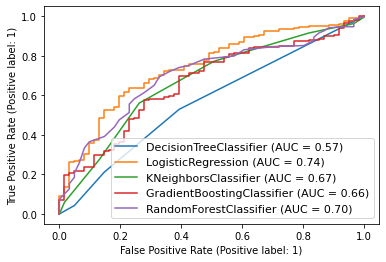

In [421]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(Lr,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [422]:
#as per roc_plot LogisticRegression model is best among all excuted will save for future use
#model Saving
import pickle
file='pikle_Lr_model'
with open(file ,'wb') as file:
    pickle.dump(Lr, file) 

Concluding Remarks-model performing quite good but not accuracy is 74% model is little biase towards No farud detection because evethough resampling 